In [ ]:
ACCESS_TOKEN = ''
ACCESS_TOKEN_SECRET = ''
CONSUMER_KEY = ''
CONSUMER_SECRET = ''

In [ ]:
import tweepy
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [ ]:
authenticate = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
authenticate.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(authenticate)

In [ ]:
public_tweets = api.user_timeline(screen_name='UberFacts', count=100, lang='en', tweet_mode='extended')

i = 1
for tweet in public_tweets[:5]:
  print(str(i) + ')' + tweet.full_text + '\n\n')
  i+=1

1)RT @UberFacts: Bryan Cranston and Aaron Paul learned how to cook crystal meth for their roles in 'Breaking Bad'


2)When Joseph Stalin was dying, his private physician was unavailable because he was already being punished for suggesting the Soviet leader needed more bed rest


3)RT @UberFacts: Picturesque facts about Thailand 🇹🇭 https://t.co/xurP1mBhkp


4)RT @UberFacts: Anyone can walk into a Sikh temple after prayers and join in the free communal meal called "Langar," regardless of their rel…


5)A higher IQ is associated with an increased chance of illegal drug use and excessive alcohol consumption




In [ ]:
data = pd.DataFrame([tweet.full_text for tweet in public_tweets], columns=['Tweets'])
data

,Tweets
0,RT @UberFacts: Bryan Cranston and Aaron Paul l...
1,"When Joseph Stalin was dying, his private phys..."
2,RT @UberFacts: Picturesque facts about Thailan...
3,RT @UberFacts: Anyone can walk into a Sikh tem...
4,A higher IQ is associated with an increased ch...
...,...
95,"RT @UberFacts: In 1962, Volvo gave away the pa..."
96,Towering facts about the history of architectu...
97,The average person has four to six dreams per ...
98,RT @UberFacts: Nickelodeon's classic green sli...


In [ ]:
def data_clean(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove @mentions
  text = re.sub(r'#', '', text) # remove hash
  text = re.sub(r'RT[\s]+', ' ', text) # removing RT sign
  text = re.sub(r'https?:\/\/\S+', ' ', text) # removing links

  return text

data.Tweets = data['Tweets'].apply(data_clean)
data.head()

,Tweets
0,: Bryan Cranston and Aaron Paul learned how t...
1,"When Joseph Stalin was dying, his private phys..."
2,: Picturesque facts about Thailand 🇹🇭
3,: Anyone can walk into a Sikh temple after pr...
4,A higher IQ is associated with an increased ch...


In [ ]:
data

,Tweets
0,: Bryan Cranston and Aaron Paul learned how t...
1,"When Joseph Stalin was dying, his private phys..."
2,: Picturesque facts about Thailand 🇹🇭
3,: Anyone can walk into a Sikh temple after pr...
4,A higher IQ is associated with an increased ch...
...,...
95,": In 1962, Volvo gave away the patent for the..."
96,Towering facts about the history of architectu...
97,The average person has four to six dreams per ...
98,: Nickelodeon's classic green slime was made ...


In [ ]:
data['subjectivity'] = data['Tweets'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
data['polarity'] = data['Tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)

data.head(15)

,Tweets,subjectivity,polarity
0,: Bryan Cranston and Aaron Paul learned how t...,0.666667,-0.700000
1,"When Joseph Stalin was dying, his private phys...",0.437500,0.250000
2,: Picturesque facts about Thailand 🇹🇭,0.000000,0.000000
3,: Anyone can walk into a Sikh temple after pr...,0.800000,0.400000
4,A higher IQ is associated with an increased ch...,0.666667,-0.166667
5,: Amaze-wing facts about hawks 🪶,0.000000,0.000000
6,Eating ice cream can actually help reduce emot...,0.375000,0.000000
7,": It took 200,000 years for the modern human ...",0.200000,0.100000
8,: Fascinating facts about food science 🍏🧬,0.850000,0.700000
9,Eating cheese after a meal can protect your te...,0.400000,-0.133333


In [ ]:
# Plotting wordcloud

string = ' '.join([sent for sent in data.Tweets])
string

' : Bryan Cranston and Aaron Paul learned how to cook crystal meth for their roles in \'Breaking Bad\' When Joseph Stalin was dying, his private physician was unavailable because he was already being punished for suggesting the Soviet leader needed more bed rest  : Picturesque facts about Thailand 🇹🇭    : Anyone can walk into a Sikh temple after prayers and join in the free communal meal called "Langar," regardless of their rel… A higher IQ is associated with an increased chance of illegal drug use and excessive alcohol consumption  : Amaze-wing facts about hawks \U0001fab6   Eating ice cream can actually help reduce emotional pain  : It took 200,000 years for the modern human population to reach one billion, and just another 200 years to reach seven billion  : Fascinating facts about food science 🍏🧬   Eating cheese after a meal can protect your teeth\n\nIt counteracts the acid left behind by various foods and provides a temporary coating of calcium that helps harden tooth enamel  : In

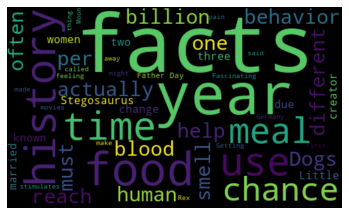

In [ ]:
wordcloud = WordCloud(width=500, height=300, random_state=42, max_font_size=119, max_words=50).generate(string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

In [ ]:
def analysis(polar):
  if polar > 0:
    return 'Positive'
  elif polar == 0:
    return 'Neutral'
  else:
    return 'Negative'

data['Analysis'] = data['polarity'].apply(analysis)

data.head()

,Tweets,subjectivity,polarity,Analysis
0,: Bryan Cranston and Aaron Paul learned how t...,0.666667,-0.700000,Negative
1,"When Joseph Stalin was dying, his private phys...",0.437500,0.250000,Positive
2,: Picturesque facts about Thailand 🇹🇭,0.000000,0.000000,Neutral
3,: Anyone can walk into a Sikh temple after pr...,0.800000,0.400000,Positive
4,A higher IQ is associated with an increased ch...,0.666667,-0.166667,Negative


In [ ]:
sortDf = data.sort_values(by=['polarity'])
sortDf[sortDf.Analysis == 'Positive']

,Tweets,subjectivity,polarity,Analysis
36,Getting less than the recommended eight hours ...,0.272222,0.027778,Positive
22,: Getting less than the recommended eight hou...,0.272222,0.027778,Positive
94,The creator of My Little Pony is married to th...,0.375000,0.031250,Positive
80,: The creator of My Little Pony is married to...,0.375000,0.031250,Positive
98,: Nickelodeon's classic green slime was made ...,0.453333,0.053333,Positive
66,Dogs can pick up on subtle changes in your sce...,0.375000,0.055556,Positive
47,: Dogs can pick up on subtle changes in your ...,0.562500,0.083333,Positive
7,": It took 200,000 years for the modern human ...",0.200000,0.100000,Positive
23,"It took 200,000 years for the modern human pop...",0.200000,0.100000,Positive
92,: Asking someone to do you a small favor can ...,0.450000,0.125000,Positive


In [ ]:
positive_tweets = data[data.Analysis == 'Positive']
negative_tweets = data[data.Analysis == 'Negative']
neutral_tweets = data[data.Analysis == 'Neutral']

positive_tweets.shape[0], negative_tweets.shape[0], neutral_tweets.shape[0]

(40, 22, 38)

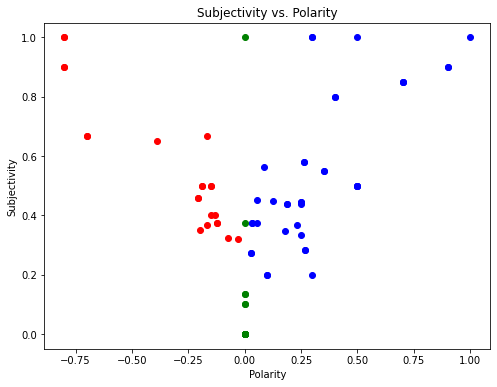

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(positive_tweets.polarity, positive_tweets.subjectivity, c='b')
plt.scatter(negative_tweets.polarity, negative_tweets.subjectivity, c='r')
plt.scatter(neutral_tweets.polarity, neutral_tweets.subjectivity, c='g')


plt.title('Subjectivity vs. Polarity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
print('Distribution of tweets by percentage:')
(data.Analysis.value_counts() / len(data))*100

Distribution of tweets by percentage:


Positive    40.0
Neutral     38.0
Negative    22.0
Name: Analysis, dtype: float64